In [1]:
# 아래의 버전에 의존성이 있습니다. 
# 다음의 버전으로 설치해 주세요.
# !pip install plotnine==0.5.0
# !pip install –upgrade pandas==0.23.4
# !pip install folium==0.5.0

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from plotnine import *

In [4]:
# 상권별 업종밀집 통계(2016)

shop = pd.read_csv('상권별_업종밀집통계_2016_.csv', engine = 'python', encoding ='cp949')
shop.shape


(805681, 6)

In [5]:
# 데이터 탐색1 (head, tail)

shop.head()
shop.tail()

,상권명칭,상권번호,관리년월,대분류명,중분류명,과밀지수(밀집도)
805676,경남 양산시 덕계동_1,626,201612,소매,NaN,1.2906
805677,경북 구미시 신평1동_2,1143,201612,업종분류불능,NaN,0.5677
805678,안양역_5,1663,201612,소매,NaN,1.6597
805679,양산역,616,201612,소매,NaN,1.4103
805680,망포역_2,1473,201612,업종분류불능,NaN,0.7113


In [6]:
# 데이터 탐색2 (칼럼별 어떤 index가 있는지)

shop['대분류명'].value_counts()

소매        791413
업종분류불능     14268
Name: 대분류명, dtype: int64

In [7]:
shop['중분류명'].value_counts()

건강/미용식품         98132
유아용품            88434
의약/의료품소매        81273
철물/난방/건설자재소매    78100
페인트/유리제품소매      74083
가전제품소매          71625
자동차/자동차용품       22440
Name: 중분류명, dtype: int64

In [8]:
# 상가업소정보 (2018년 6월)

shop_2018_01 = pd.read_csv('소상공인시장진흥공단_상가업소정보_201806_01.csv',engine = 'python', encoding ='cp949')
shop_2018_01.shape

(476183, 39)

In [9]:
# 데이터탐색1 


shop_2018_01.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [10]:
# 데이터 칼럼보기

shop_2018_01.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
# 필요한 칼럼만 보기
# 1st. 필요한 칼럼 리스트에 넣기
# 만든 리스트를 하나의 객체로 표현 "파일['리스트']"

view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
              '상권업종소분류명', '시도명', '시군구명', 
              '행정동명', '법정동명', '지번주소', '경도', '위도']

shop_2018_01[view_columns].head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,엘가커피부산아시아드점,부산아시아드점,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,거제2동,거제동,부산광역시 연제구 거제동 1208,129.062034,35.191284
1,비비안아울렛중계점,아울렛중계점,소매,의복의류,셔츠/내의/속옷,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 중계동 509,127.067888,37.641280
2,연세정신건강의학과의원,NaN,의료,병원,기타병원,서울특별시,종로구,창신1동,창신동,서울특별시 종로구 창신동 297,127.014500,37.573196
3,독일지멘스보청기은평점,은평점,소매,의약/의료품소매,보청기판매,서울특별시,은평구,불광1동,불광동,서울특별시 은평구 불광동 281-108,126.929871,37.610888
4,서울모드,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,신사동,서울특별시 강남구 신사동 517-27,127.022212,37.519315


In [12]:
# 결측치 확인하기

shop_2018_01.isnull().sum()

상가업소번호            0
상호명               1
지점명          416061
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      27664
표준산업분류명       27664
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         80599
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        413186
건물관리번호            0
건물명          265997
도로명주소             0
구우편번호             0
신우편번호             9
동정보          433303
층정보          184584
호정보          405945
경도                0
위도                0
dtype: int64

In [13]:
# 폰트 설정

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'

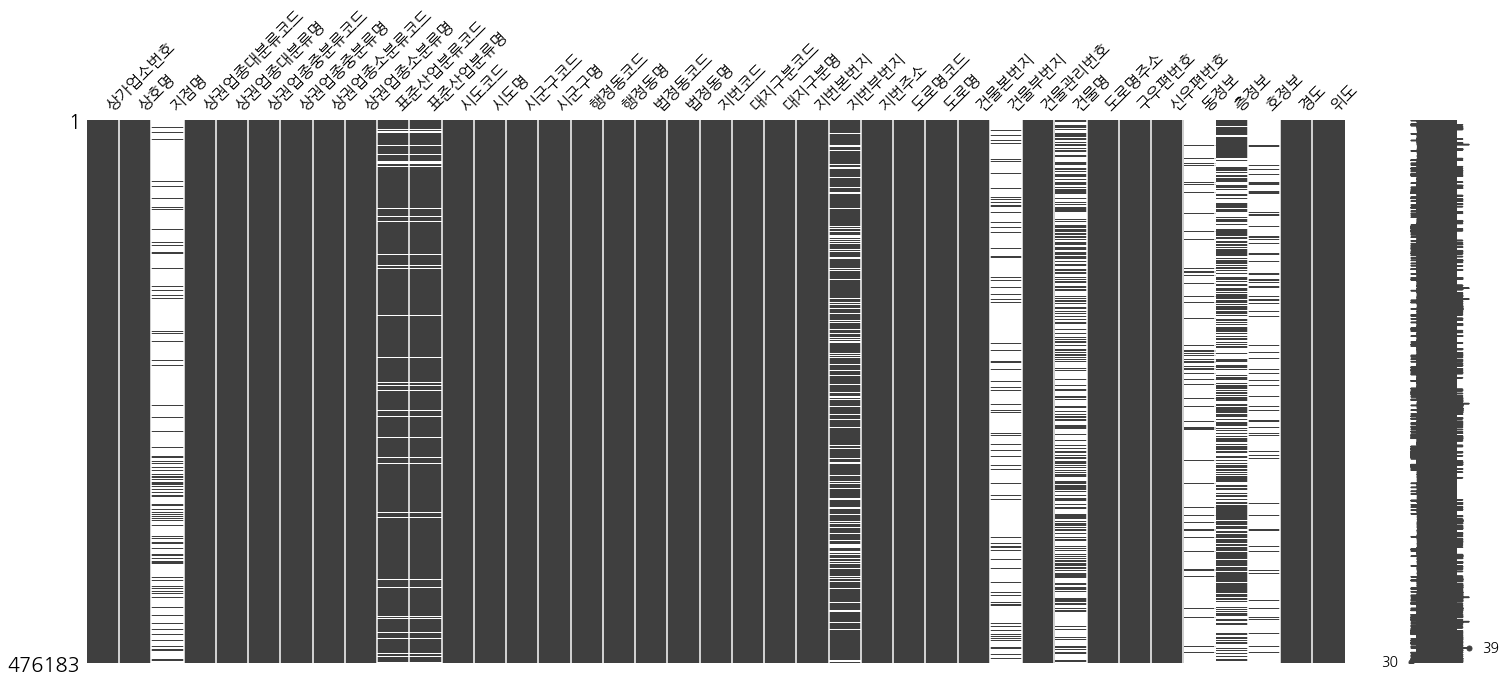

In [14]:
# 결측치에 대한 시각화

import missingno as msno


msno.matrix(shop_2018_01)

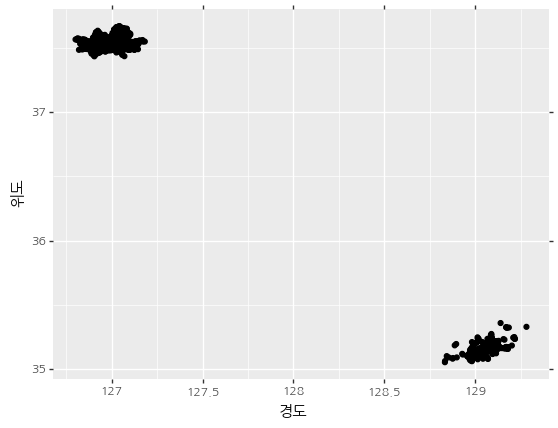

<ggplot: (133207322646)>

In [15]:
# 데이터 1000개만 조회

(ggplot(shop_2018_01[:1000])
+ aes(x='경도', y ='위도')
+ geom_point()
+ theme(text=element_text(family='NanumGothic')))

In [16]:
# 점들이 극단적으로 이분법이됨
# 왜그러는지 한번 조사해야함.
# 서울 vs 비서울 비교를 해야함.
# 특정값 볼때는 = loc함수 

seoul_with = shop_2018_01.loc[shop_2018_01['시도명'].str.startswith('서울')]
seoul_withOut = shop_2018_01.loc[~shop_2018_01['시도명'].str.startswith('서울')]

print(seoul_with.shape, '<== seoul_with')
print(seoul_withOut.shape, '<-- seoul_withOut')

(330089, 39) <== seoul_with
(146094, 39) <-- seoul_withOut


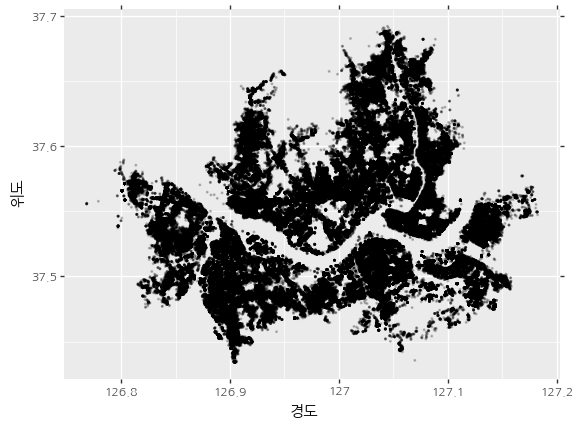

<ggplot: (133235002944)>

In [17]:
# 서울인 것들만 추출해서 찍어보라.

(ggplot(seoul_with)
+ aes(x='경도', y ='위도')
+ geom_point(color='black', alpha=0.2, size=0.2)
+ theme(text=element_text(family='NanumGothic')))

In [18]:
# 시도/구군을 나누기 위한 전처리 
# 시도/구군 데이터 칼럼 추가하기

shop_2018_01['도로명주소'].head()

0       부산광역시 연제구 종합운동장로 7
1    서울특별시 노원구 동일로204가길 46
2       서울특별시 종로구 종로 335-3
3        서울특별시 은평구 통일로 732
4     서울특별시 강남구 도산대로11길 29
Name: 도로명주소, dtype: object

In [19]:
# 시도/구군 데이터 칼럼 나누었는지 확인
print(shop_2018_01.shape, "<== 전처리 전")

# 시도/구군 나누기
# 시도 칼럼 만들기(전처리; 띄어쓰기)

shop_2018_01['시도'] = shop_2018_01['도로명주소'].str.split(' ', expand=True)[0]
shop_2018_01['구군'] = shop_2018_01['도로명주소'].str.split(' ', expand=True)[1]

print(shop_2018_01.shape, "<== 전처리 후")
# shop_2018_01['시도'] = shop_2018_01.loc[shop_2018_01['도로명주소'].str.startswith('서울')]

(476183, 39) <== 전처리 전
(476183, 41) <== 전처리 후


In [20]:
k_su = shop_2018_01.loc[shop_2018_01['시도'].str.startswith('서울')]

print(k_su.shape, "<== 전처리해서 만든 칼럼")
print(seoul_with.shape, "<== 전처리 안하고 시도명을 신뢰함으로 만듬")

(330089, 41) <== 전처리해서 만든 칼럼
(330089, 39) <== 전처리 안하고 시도명을 신뢰함으로 만듬


In [21]:
shop_2018_01.shape

(476183, 41)

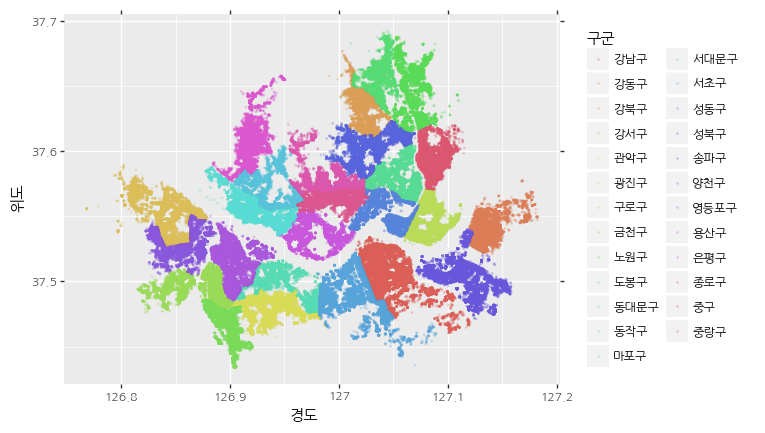

<ggplot: (-9223371903647156669)>

In [22]:
# 서울지도 다시 그리는데, 구군 나눠서

(ggplot(k_su)
+ aes(x='경도', y ='위도', color='구군')
+ geom_point(alpha=0.2, size=0.2)       # 기존의 color 변수 없엠
+ theme(text=element_text(family='NanumGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green')
)

In [23]:
# 업종명 데이터 전처리

k_su['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

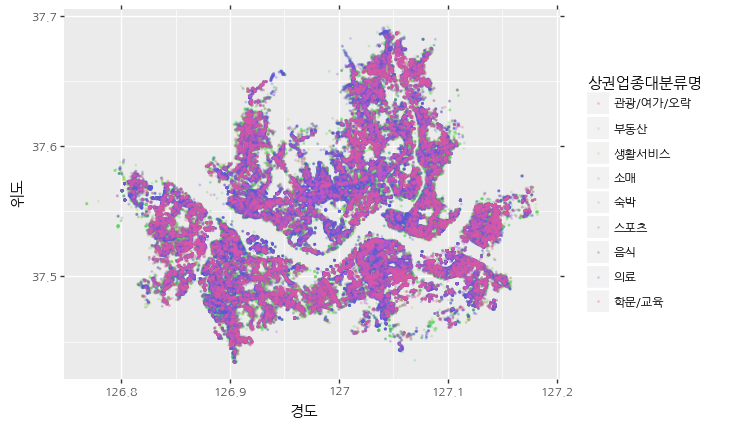

<ggplot: (133207365629)>

In [24]:
# 업종명으로 분류한 지도 그려보기

(ggplot(k_su)
+ aes(x='경도', y ='위도', color='상권업종대분류명')
+ geom_point(alpha=0.2, size=0.2)       # 기존의 color 변수 없엠
+ theme(text=element_text(family='NanumGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green')
)

In [25]:
# 상권업종대분류명 index 알아보기

shop_2018_01['상권업종대분류명'].value_counts()

음식          157467
소매          150740
생활서비스        76022
학문/교육        36113
의료           20646
부동산          17199
관광/여가/오락     13164
숙박            4756
스포츠             76
Name: 상권업종대분류명, dtype: int64

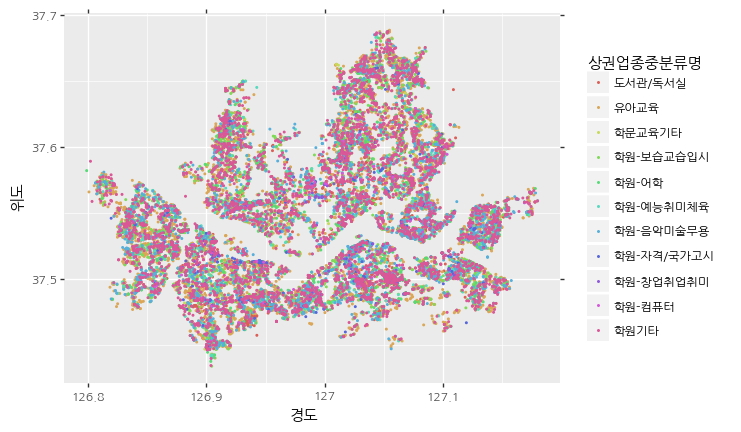

<ggplot: (133208643816)>

In [35]:
# 특정 (학문/교육) 관련 정보 조회 시각화
# 특정항목 만 조회 => loc
# 흠.. loc와 '==' 차이는 무엇인지..
upzong_edu = k_su.loc[k_su['상권업종대분류명'].str.startswith('학문')]

(ggplot(upzong_edu)
+ aes(x='경도', y ='위도', color='상권업종중분류명')
+ geom_point(size=0.2)       # 기존의 color 변수 없엠
+ theme(text=element_text(family='NanumGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green')
)

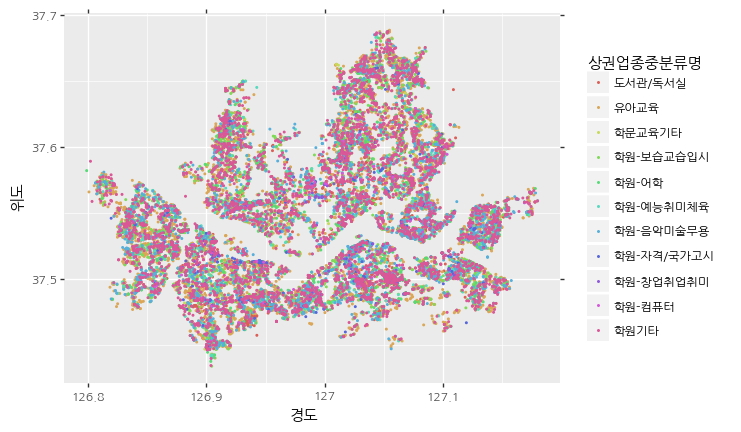

<ggplot: (133208596800)>

In [34]:
k_su_edu = k_su.loc[k_su['상권업종대분류명']=='학문/교육']

(ggplot(k_su_edu)
+ aes(x='경도', y ='위도', color='상권업종중분류명')
+ geom_point(size=0.2)       # 기존의 color 변수 없엠
+ theme(text=element_text(family='NanumGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green')
)

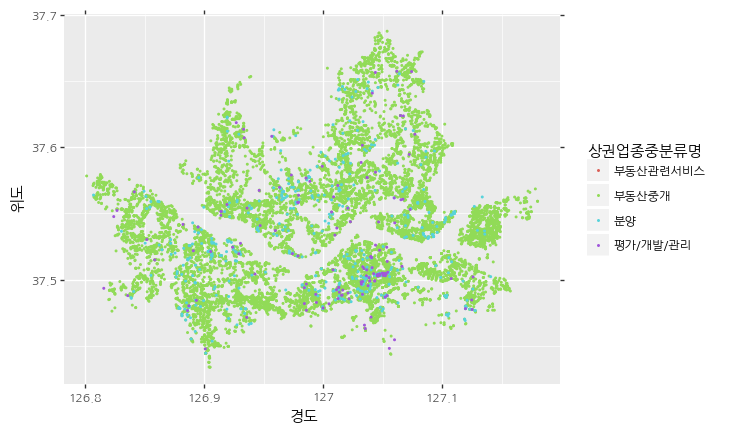

<ggplot: (133208637146)>

In [33]:
# 부동산 관련 업종보기 (중분류)
# 1. 부동산만 조회
k_su_prp = k_su.loc[k_su['상권업종대분류명']=='부동산']

# 시각화

(ggplot(k_su_prp)
+ aes(x='경도', y ='위도', color='상권업종중분류명')
+ geom_point(size=0.2)       # 기존의 color 변수 없엠
+ theme(text=element_text(family='NanumGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green')
)

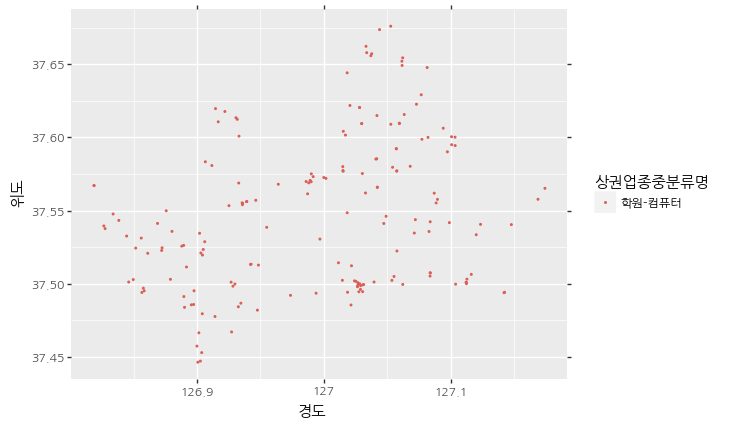

<ggplot: (133207517125)>

In [36]:
# 중분류 단계에서 학원컴퓨터 특정 항목 조회하기

k_su_edu_acd = k_su.loc[k_su['상권업종중분류명']=='학원-컴퓨터']

(ggplot(k_su_edu_acd)
+ aes(x='경도', y ='위도', color='상권업종중분류명')
+ geom_point(size=0.2)       # 기존의 color 변수 없엠
+ theme(text=element_text(family='NanumGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green')
)

In [37]:
# 학원-컴퓨터 지도에 뿌리기
# 1. 지도에 뿌리는 구문

import folium

def show_marker_map(geo_df):
    map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                     zoom_start=12, tiles='Stamen Terrain')

    for n in geo_df.index:
        shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']       # 클릭하면 상호명 나오게
        folium.Marker([geo_df.loc[n, '위도'], 
                       geo_df.loc[n, '경도']], 
                      popup=shop_name).add_to(map)

    return map

In [39]:
show_marker_map(k_su_edu_acd)

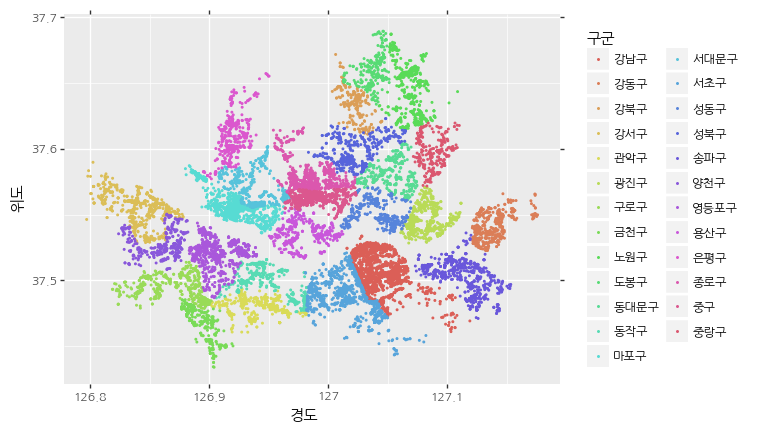

<ggplot: (133208805205)>

In [42]:
# 편의점 카페 분포보기

k_su_cafe = k_su.loc[k_su['상권업종중분류명']=='커피점/카페']

(ggplot(k_su_cafe)
+ aes(x='경도', y ='위도', color='구군')
+ geom_point(size=0.2)       # 기존의 color 변수 없엠
+ theme(text=element_text(family='NanumGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green'))

In [43]:
# 중구의 지역만 보기

geo_df = k_su_cafe[k_su_cafe["구군"] == '중구']

map = folium.Map(location=[geo_df['위도'].mean(), 
                           geo_df['경도'].mean()], 
                 zoom_start=16, tiles='Stamen Terrain')

for n in geo_df.index:
    shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], 
                  popup=shop_name).add_to(map)

map

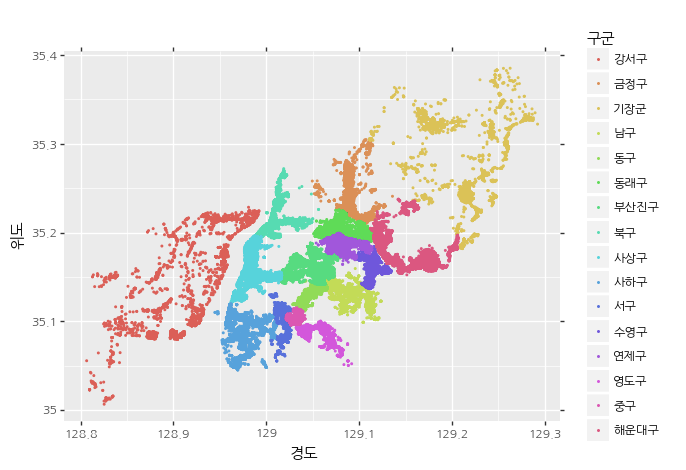

<ggplot: (133208815978)>

In [44]:
# 서울외 지역 보기

k_not_su = shop_2018_01.loc[~shop_2018_01['도로명주소'].str.startswith('서울')]

(ggplot(k_not_su)
+ aes(x='경도', y ='위도', color='구군')
+ geom_point(size=0.2)       # 기존의 color 변수 없엠
+ theme(text=element_text(family='NanumGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green'))